In [ ]:
import tensorflow as tf
# from tensorflow import keras
from keras.datasets import cifar10
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import SGD
nc = 10

In [ ]:
(Xtrain,ytrain), (Xtest, ytest) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


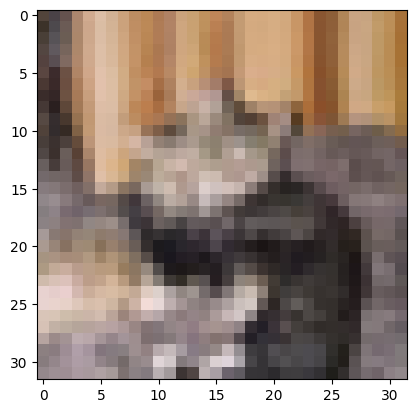

In [ ]:
imgplot1 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

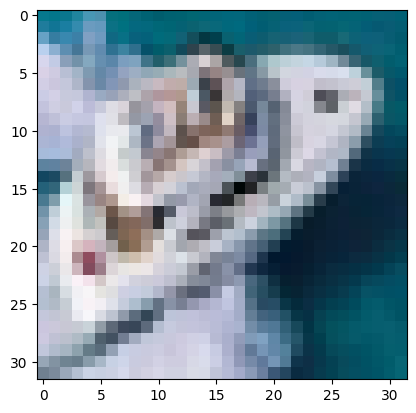

In [ ]:
imgplot2 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()

In [ ]:
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain[0:20000,:]/255.0
Xtest = Xtest.astype('float32')
Xtest = Xtest/255.0

In [ ]:
ytrain = ytrain[:,0]
ytrainEnc = tf.one_hot(ytrain[0:20000], depth = nc)
ytest = ytest[:,0]
ytestEnc = tf.one_hot(ytest, depth = nc)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = "relu", kernel_initializer = "he_uniform",padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(32,(3,3), activation = "relu", kernel_initializer = "he_uniform",padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation = "relu", kernel_initializer = "he_uniform", padding = 'same'))
model.add(Conv2D(64,(3,3), activation = "relu", kernel_initializer = "he_uniform", padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation = "relu", kernel_initializer = "he_uniform", padding = 'same'))
model.add(Conv2D(128,(3,3), activation = "relu", kernel_initializer = "he_uniform", padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_initializer = "he_uniform"))
model.add(Dense(10,activation = 'softmax'))
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(Xtrain, ytrainEnc, epochs = 100, batch_size = 550, validation_data = (Xtest, ytestEnc))

Epoch 1/100
37/37 [==============================] - 14s 98ms/step - loss: 2.2683 - accuracy: 0.1609 - val_loss: 2.2014 - val_accuracy: 0.2225
Epoch 2/100
37/37 [==============================] - 2s 45ms/step - loss: 2.1278 - accuracy: 0.2539 - val_loss: 2.0244 - val_accuracy: 0.2928
Epoch 3/100
37/37 [==============================] - 2s 47ms/step - loss: 1.9653 - accuracy: 0.3056 - val_loss: 1.8977 - val_accuracy: 0.3235
Epoch 4/100
37/37 [==============================] - 2s 47ms/step - loss: 1.8711 - accuracy: 0.3385 - val_loss: 1.8219 - val_accuracy: 0.3575
Epoch 5/100
37/37 [==============================] - 2s 48ms/step - loss: 1.7949 - accuracy: 0.3722 - val_loss: 1.7674 - val_accuracy: 0.3899
Epoch 6/100
37/37 [==============================] - 2s 45ms/step - loss: 1.7444 - accuracy: 0.3810 - val_loss: 1.7174 - val_accuracy: 0.3925
Epoch 7/100
37/37 [==============================] - 2s 48ms/step - loss: 1.6841 - accuracy: 0.4074 - val_loss: 1.6849 - val_accuracy: 0.3980
Epoch

In [ ]:
ypred = model.predict(Xtest)
ypred = np.argmax(ypred, axis = 1)

313/313 [==============================] - 1s 3ms/step


In [ ]:
score = accuracy_score(ypred, ytest)
print('Accuracy score is', 100*score, " %")

Accuracy score is 58.209999999999994  %
